<a href="https://colab.research.google.com/github/ankitbittu/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/Copy_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Capstone 2/Copy of TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.shape

(381109, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df.drop('id',axis=1,inplace=True)

In [5]:
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [15]:
df.describe(include='object')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [6]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

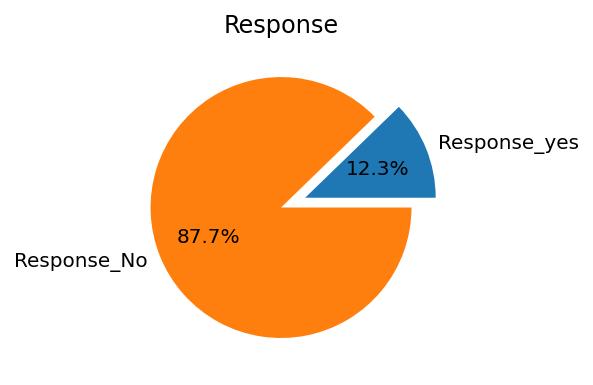

In [7]:
Percent_response_yes = round((df['Response'].mean() * 100),3)
Percent_response_no = round((100 - Percent_response_yes),3)
x = [Percent_response_yes, Percent_response_no]
labels = ['Response_yes', 'Response_No']
explode = [0.2, 0]

fig, ax = plt.subplots(figsize=(4,3),dpi = 144)
ax.pie(x, labels = labels,explode = explode, autopct='%1.1f%%')
ax.set_title('Response')
plt.show()

The data is highly imbalanced.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


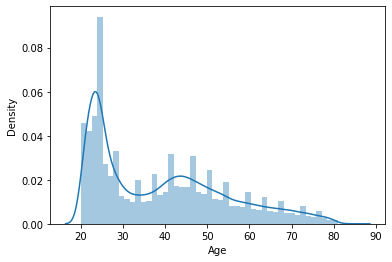

In [8]:
# Age distribution
sns.distplot(df['Age'])

Most of the consumers are under the age of 20-30.

In [9]:
df['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

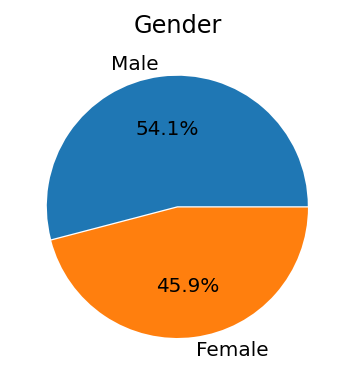

In [10]:
Percent_male = round(((df['Gender'].value_counts()[0]/(df['Gender'].value_counts()[0] + df['Gender'].value_counts()[1])) * 100),3)
Percent_female = round((100 - Percent_male),3)
x = [Percent_male, Percent_female]
labels = ['Male', 'Female']
explode = [0.01, 0]

fig, ax = plt.subplots(figsize=(4,3),dpi = 144)
ax.pie(x, labels = labels,explode = explode, autopct='%1.1f%%')
ax.set_title('Gender')
plt.show()

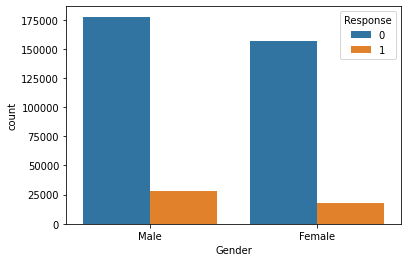

In [11]:
sns.countplot(x=df['Gender'],hue=df['Response'])

In [12]:
df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

<Figure size 720x576 with 0 Axes>

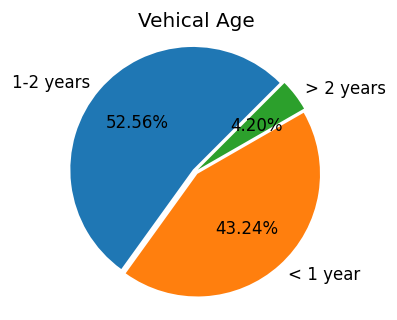

In [13]:
plt.figure(figsize=(10,8))

fig, ax = plt.subplots(figsize=(3,3),dpi = 120)
ax.pie(df['Vehicle_Age'].value_counts(),explode=[.1,.1,.1],startangle=45,autopct='%.2f%%',radius=4,labels=['1-2 years','< 1 year','> 2 years'])
ax.set_title('Vehical Age')
plt.axis('equal')
plt.show()

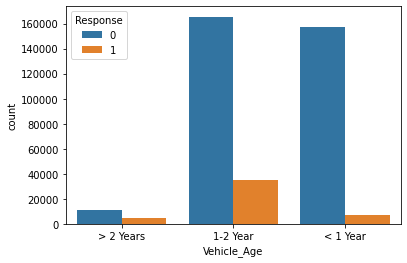

In [14]:
sns.countplot(x=df['Vehicle_Age'],hue=df['Response'])

In [15]:
pd.crosstab(df['Response'], df['Vehicle_Age'])

Vehicle_Age,1-2 Year,< 1 Year,> 2 Years
Response,,,
0,165510,157584,11305
1,34806,7202,4702


In [16]:
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

<Figure size 720x576 with 0 Axes>

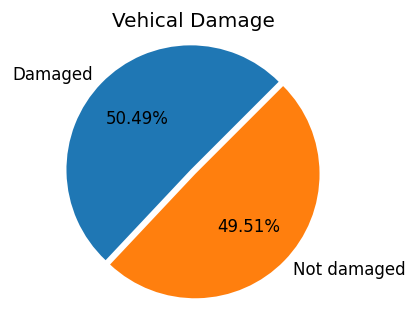

In [17]:
plt.figure(figsize=(10,8))

fig, ax = plt.subplots(figsize=(3,3),dpi = 120)
ax.pie(df['Vehicle_Damage'].value_counts(),explode=[.1,.1],startangle=45,autopct='%.2f%%',radius=4,labels=['Damaged','Not damaged'])
ax.set_title('Vehical Damage')
plt.axis('equal')
plt.show()

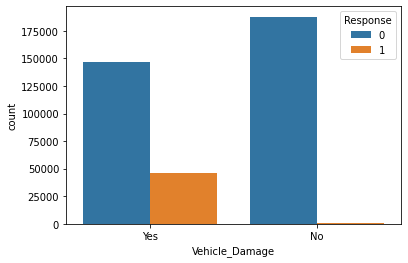

In [18]:
sns.countplot(x=df['Vehicle_Damage'],hue=df['Response'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


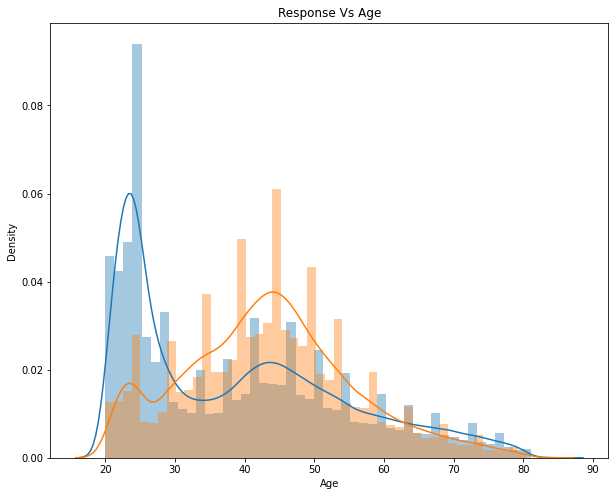

In [19]:
plt.figure(figsize=(10,8))
sns.distplot(df['Age'],label='Age')
sns.distplot(df['Age'][df['Response']==1])
plt.title('Response Vs Age')
plt.show()

Age group of 40-50 have higher chance of buying the vehicle insurance

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


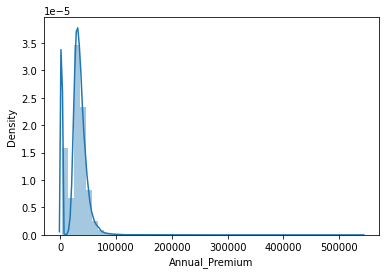

In [20]:
sns.distplot(df['Annual_Premium'])

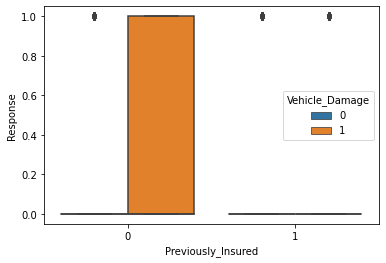

In [29]:
sns.bplot(x=df['Previously_Insured'],y=df['Response'],hue=df['Vehicle_Damage'])

# Scaling Annual Premium and Age

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Annual_Premium'] = scaler.fit_transform(df[['Annual_Premium']])

Gender, Vehicle_Age and Vehicle_Damage need to be converted to numerical data.

In [21]:
gender = pd.get_dummies(df['Gender'], drop_first=True)
df = pd.concat([df, gender], axis=1)
df.drop('Gender', axis=1, inplace=True)

damage = pd.get_dummies(df['Vehicle_Damage'], drop_first=True)
df = pd.concat([df, damage], axis=1)
df.drop('Vehicle_Damage', axis=1, inplace=True)

In [22]:
df.rename(columns={'Yes': 'Vehicle_Damage', 'Male': 'Gender_male'}, inplace=True)

In [86]:
df.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_male,Vehicle_Damage
0,1,44,1,28.0,0,2,40454.0,26.0,217,1,1,1
1,2,76,1,3.0,0,1,33536.0,26.0,183,0,1,0
2,3,47,1,28.0,0,2,38294.0,26.0,27,1,1,1
3,4,21,1,11.0,1,0,28619.0,152.0,203,0,1,0
4,5,29,1,41.0,1,0,27496.0,152.0,39,0,0,0


In [23]:
age_dict = {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}
df['Vehicle_Age'] = df['Vehicle_Age'].map(age_dict)

In [24]:
df.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_male,Vehicle_Damage
0,44,1,28.0,0,2,40454.0,26.0,217,1,1,1
1,76,1,3.0,0,1,33536.0,26.0,183,0,1,0
2,47,1,28.0,0,2,38294.0,26.0,27,1,1,1
3,21,1,11.0,1,0,28619.0,152.0,203,0,1,0
4,29,1,41.0,1,0,27496.0,152.0,39,0,0,0


(array([128040.,  43931.,  37485.,  47888.,  46726.,  26652.,  22318.,
         14719.,  11397.,   1953.]),
 array([20. , 26.5, 33. , 39.5, 46. , 52.5, 59. , 65.5, 72. , 78.5, 85. ]),
 <a list of 10 Patch objects>)

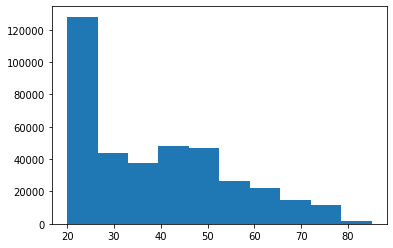

In [25]:
plt.hist(df.Age)

In [5]:
df.groupby(['Vehicle_Age','Vehicle_Damage','Previously_Insured'])['Response'].value_counts()

Vehicle_Age  Vehicle_Damage  Previously_Insured  Response
1-2 Year     No              0                   0            12106
                                                 1              557
                             1                   0            59389
                                                 1               39
             Yes             0                   0            88174
                                                 1            34154
                             1                   0             5841
                                                 1               56
< 1 Year     No              0                   0            10966
                                                 1              353
                             1                   0           105238
                                                 1               33
             Yes             0                   0            37423
                                                 1        

In [67]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,0.369231,1,28.0,0,> 2 Years,Yes,0.070366,26.0,217,1
1,Male,0.861538,1,3.0,0,1-2 Year,No,0.057496,26.0,183,0
2,Male,0.415385,1,28.0,0,> 2 Years,Yes,0.066347,26.0,27,1
3,Male,0.015385,1,11.0,1,< 1 Year,No,0.048348,152.0,203,0
4,Female,0.138462,1,41.0,1,< 1 Year,No,0.046259,152.0,39,0


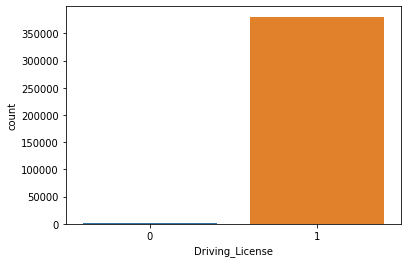

In [6]:
sns.countplot(data=df, x='Driving_License')

Certainly, most of our customers must have driving license in order to drive a car.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


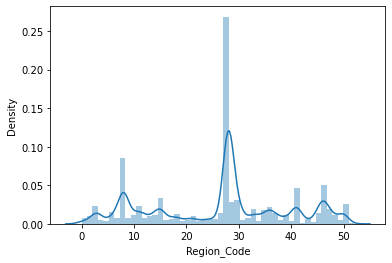

In [10]:
sns.distplot(df['Region_Code'])

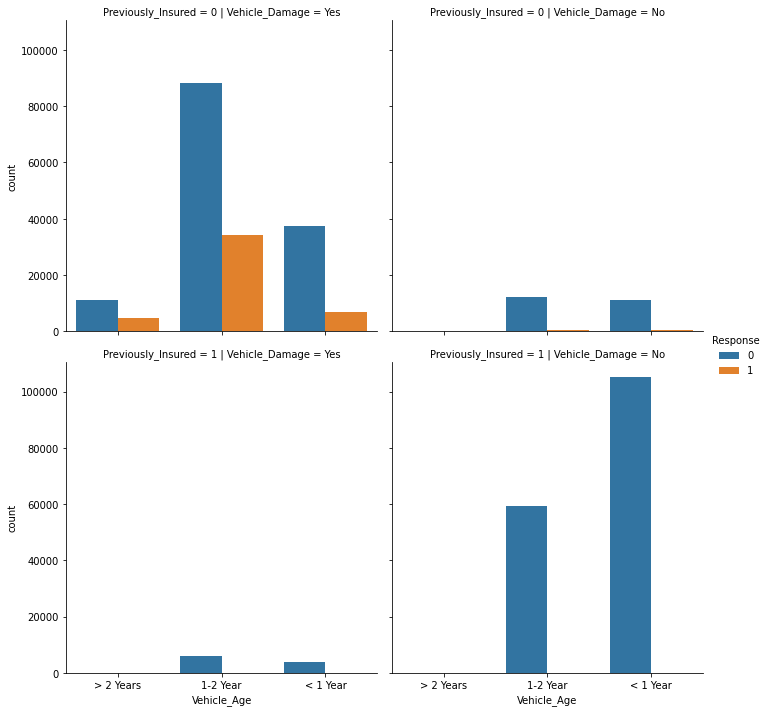

In [16]:
sns.catplot(data=df, x='Vehicle_Age', hue='Response', col='Vehicle_Damage', row='Previously_Insured', kind='count')

From the above plot, it can be seen that all the damaged vehicles which are not previously insured are interested in taking Vehicle insurance.

Customers already having the previous insurance are not interested in taking the new insurance.

Vehicle Damage is clearly related to Response, clients whose vehicle never damaged didn't opt for Vehicle Insurance

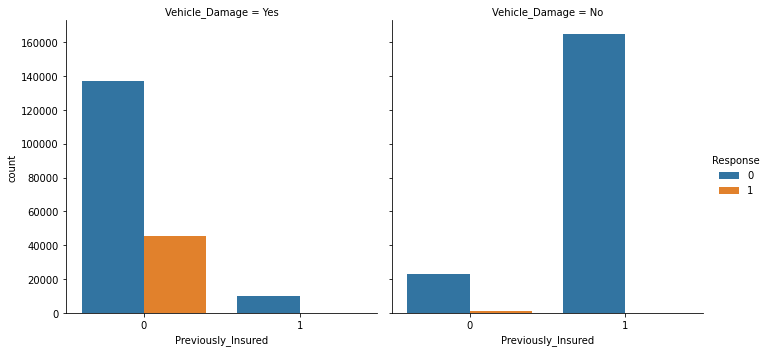

In [15]:
sns.catplot(data=df, x='Previously_Insured', hue='Response', col='Vehicle_Damage', kind='count')